# Exploring Efficiency Gap Data
#### Herbert Milton Turner IV and Kevin Yuchen Sun
The purpose of this notebook is to explore the efficiency gap data for several states and be able to see the trends for each state over time. Graphs can be compared to see show which states have more partisan bias.

In [1]:
import pandas as pd
import numpy as np

### Data Gathering and Cleaning
The data we use is collected and downloaded from kaggle: https://www.kaggle.com/sohier/state-election-results-1971-2012. 

Discription from the site: "This dataset contains results of general elections to the lower house of the state legislatures in the United States over the last fifty years, up to 2012. This dataset was created by the Princeton Gerrymandering Project as part of their effort to analyze and combat partisan gerrymandering. The Supreme Court will be hearing a very important case on this issue on October 3rd 2017. Regardless of who wins, this dataset will be of interest to anyone hoping to defeat (or achieve!) a gerrymandering attempt."

In [2]:
df = pd.read_csv('state_legislative_election_results_1971_2012.csv')
df.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,State,District,Year,Party,Incumbent,Dem Votes,GOP Votes,Other Votes
0,AK,1,1992,D,0,3019,3002,0
1,AK,2,1992,D,1,4704,2169,0
2,AK,3,1992,D,1,5210,2233,0
3,AK,4,1992,R,1,1754,4538,294
4,AK,5,1992,D,1,3953,0,1153


Let's start calculating the Efficiency Gap for each of these districts.

In [3]:
df['Efficiency Gap'] = 0
df.head()

,State,District,Year,Party,Incumbent,Dem Votes,GOP Votes,Other Votes,Efficiency Gap
0,AK,1,1992,D,0,3019,3002,0,0
1,AK,2,1992,D,1,4704,2169,0,0
2,AK,3,1992,D,1,5210,2233,0,0
3,AK,4,1992,R,1,1754,4538,294,0
4,AK,5,1992,D,1,3953,0,1153,0


Upon closer inspection, some early data is missing for a couple of states. Below, the earliest year of data gathered is shown for each of the states, while the earliest common year is also printed.

In [4]:
earliest_years = []
states = []
for i in range(len(df)):
    state = df['State'][i]
    if state not in states:
        states.append(state)
        earliest_years.append(df['Year'][i])
print("Earliest years of", len(earliest_years), 'states:', earliest_years)
print()
print('Earliest common year:', max(earliest_years))

Earliest years of 38 states: [1992, 1974, 1982, 1972, 1972, 1972, 1972, 1982, 1992, 1982, 1972, 1982, 1992, 1972, 1971, 1978, 1978, 1972, 1972, 1972, 1979, 1974, 2002, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1974, 1972, 1976, 1972, 1985, 1972, 1992]

Earliest common year: 2002


Some states only have data from 2002 at earliest. However, let's decide to keep all data. Below is the function to calculate the Efficiency Gap in a district. The results are stored in a Pandas dataframe called "df". To save time for future running, the csv ouput is commented out and the df can be loaded in a few cells down.

In [5]:
def calculateEG(d, r, winner):
    if winner == 'D':
        return (d - (d + r) / 2 - r) / (d + r)
    if winner == 'R':
        return (r - (d + r) / 2 - d) / (d + r)
    else:
        return 0


# for i in range(len(df)):
#     df.loc[i, 'Efficiency Gap'] = calculateEG(df['Dem Votes'][i], df['GOP Votes'][i], df['Party'][i])
    
# df.to_csv('state_legislative_election_results_with_eg.csv', index=False)

In [6]:
df = pd.read_csv('state_legislative_election_results_with_eg.csv')
df.head()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,State,District,Year,Party,Incumbent,Dem Votes,GOP Votes,Other Votes,Efficiency Gap
0,AK,1,1992,D,0,3019,3002,0,-0.497177
1,AK,2,1992,D,1,4704,2169,0,-0.131165
2,AK,3,1992,D,1,5210,2233,0,-0.100027
3,AK,4,1992,R,1,1754,4538,294,-0.057533
4,AK,5,1992,D,1,3953,0,1153,0.500000


Upon closer inspection, some Efficiency Gap's are 0, some are 0.5, and some are missing. An EG of 0 may mean that and Independent won the district, while an EG of 0.5 most likely means a unaminous district in favor of a Democrat or Republican. Meanwhile, missing EG's may signify that data for votes was missing for that district, state, and year. Since several election results are tallied using pen and paper, it is highly probable that loss of information is cause for the missing data.

McGhee and Stephanopoulos use a special method to account for the 0.5 unaminous (unopposed) districts, which would skew the average Efficiency Gap for a state and year if counted in. However, in our case, we omit these districts where the EG is 0, 0.5, or NaN. The reason for ommiting unaminous districts is becasue we do not have sufficient data to estimate the degree of "unopposedness" as McGhee and Stephanopoulos uses.

In [8]:
eg_df = pd.DataFrame(columns=
                     ['State', 'District', 'Year', 'Party', 'Incumbent', 'Dem Votes', 
                      'GOP Votes', 'Other Votes', 'Efficiency Gap'])

for i in range(len(df)):
    if (df['Efficiency Gap'][i] not in [0, 0.5]) and (not np.isnan(df['Efficiency Gap'][i])) :
        eg_df = eg_df.append(df.loc[i])

eg_df.head()

,State,District,Year,Party,Incumbent,Dem Votes,GOP Votes,Other Votes,Efficiency Gap
0,AK,1,1992,D,0,3019,3002,0,-0.497177
1,AK,2,1992,D,1,4704,2169,0,-0.131165
2,AK,3,1992,D,1,5210,2233,0,-0.100027
3,AK,4,1992,R,1,1754,4538,294,-0.057533
6,AK,7,1992,R,1,2433,3078,482,-0.382961


In [7]:
# eg_df.to_csv('efficiency_gap_data.csv', index=False)
eg_df = pd.read_csv('efficiency_gap_data.csv')
eg_df.head()

,State,District,Year,Party,Incumbent,Dem Votes,GOP Votes,Other Votes,Efficiency Gap
0,AK,1,1992,D,0,3019,3002,0,-0.497177
1,AK,2,1992,D,1,4704,2169,0,-0.131165
2,AK,3,1992,D,1,5210,2233,0,-0.100027
3,AK,4,1992,R,1,1754,4538,294,-0.057533
4,AK,7,1992,R,1,2433,3078,482,-0.382961


With the important efficiency gap data per district now loaded into the dataframe, "eg_df", we can no construct our final dataframe, "eg_df2", that calculates state averages per year. Democrat wins, Republican Wins, Total Democratic Votes, Total Republican Votes, Total Other Votes will be summed together, while Average Efficiency Gap will be averaged.

In [8]:
eg_df2 = pd.DataFrame(columns=
                     ['State', 'Year', 'Dem Wins', 'GOP Wins', 'Total Dem Votes', 
                      'Total GOP Votes', 'Total Other Votes', 'Average Efficiency Gap'])

used_state_years = []

for i in range(len(eg_df)):
    current_state_year = eg_df['State'][i] + str(eg_df['Year'][i])
    if current_state_year not in used_state_years:
        used_state_years.append(current_state_year)
        dem_wins = 0
        gop_wins = 0
        total_dem_votes = 0
        total_gop_votes = 0
        total_other_votes = 0
        total_eg = 0
        num_districts = 0
        for j in range(i, len(eg_df)):
            if eg_df['State'][j] + str(eg_df['Year'][j]) == current_state_year:
                if eg_df['Party'][j] == 'D':
                    dem_wins += 1
                if eg_df['Party'][j] == 'R':
                    gop_wins += 1
                total_dem_votes += eg_df['Dem Votes'][j]
                total_gop_votes += eg_df['GOP Votes'][j]
                total_other_votes += eg_df['Other Votes'][j]
                total_eg += eg_df['Efficiency Gap'][j]
                num_districts += 1
            else:
#                 print(current_state_year, 'stop', num_districts)
                break

        eg_df2 = eg_df2.append({'State': eg_df['State'][i], 'Year': eg_df['Year'][i], 'Dem Wins': dem_wins, 
                       'GOP Wins': gop_wins, 'Total Dem Votes': total_dem_votes, 
                       'Total GOP Votes': total_gop_votes, 'Total Other Votes': total_other_votes, 
                       'Average Efficiency Gap': total_eg / num_districts}, ignore_index=True)

In [9]:
# eg_df2.to_csv('average_efficiency_gap_data.csv', index=False)
eg_df2 = pd.read_csv('average_efficiency_gap_data.csv')      
eg_df2.head()

,State,Year,Dem Wins,GOP Wins,Total Dem Votes,Total GOP Votes,Total Other Votes,Average Efficiency Gap
0,AK,1992,14,17,82584,86551,11777,-0.325900
1,AK,1994,11,18,67754,74439,6706,-0.308764
2,AK,1996,11,23,79837,109477,1852,-0.270325
3,AK,1998,7,17,54724,70278,760,-0.304081
4,AK,2000,8,15,64500,79000,2629,-0.246676


### Data Visualization
Now, we can finally construct data visualizations and graphs to compare the EG between states and see how EG changes for a state over time.

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


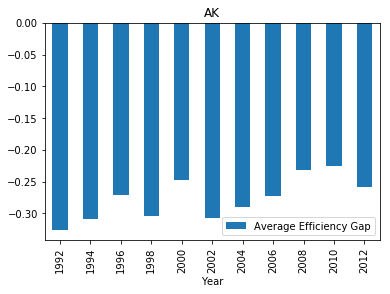

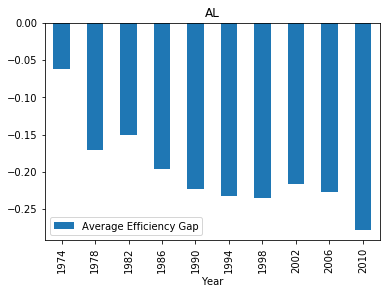

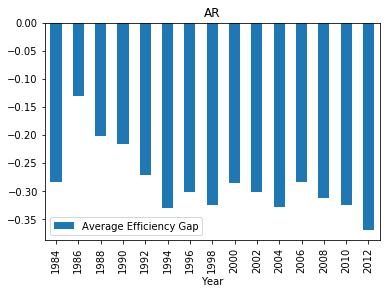

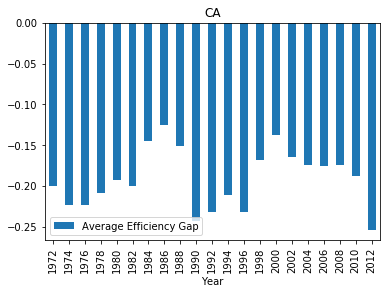

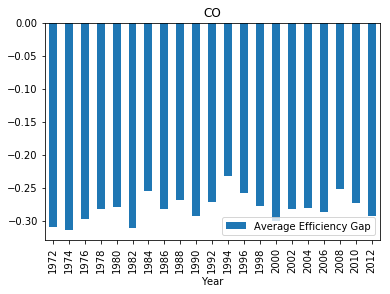

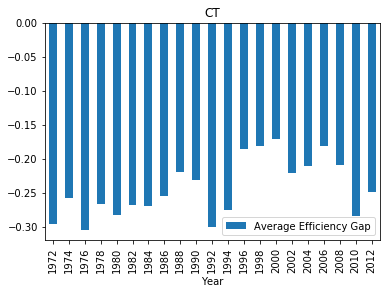

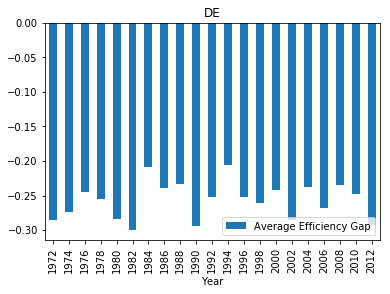

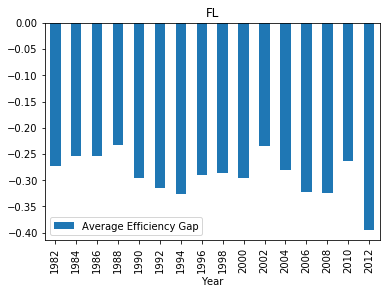

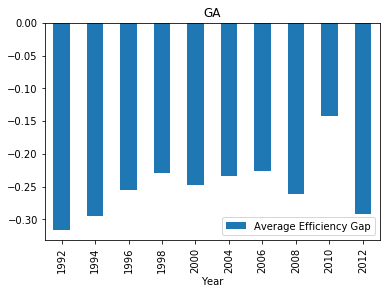

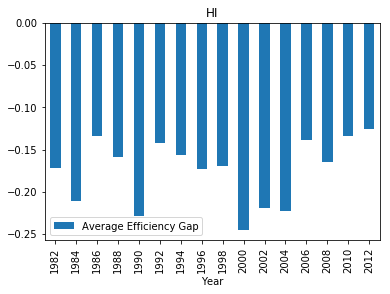

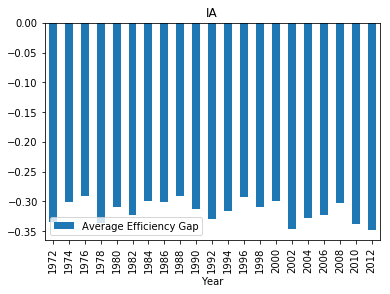

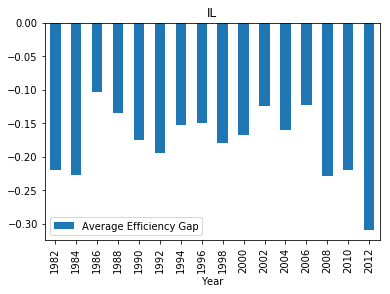

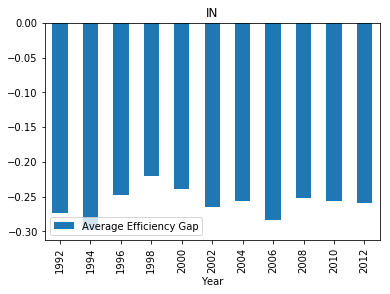

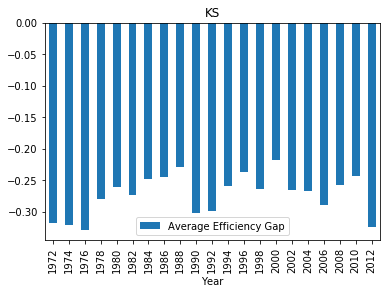

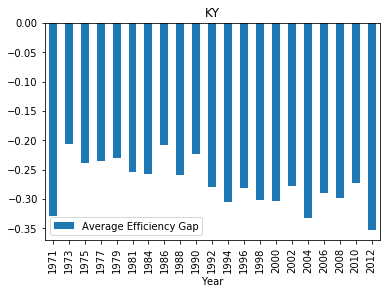

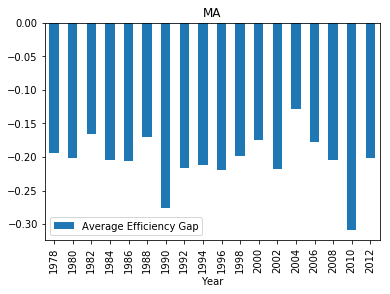

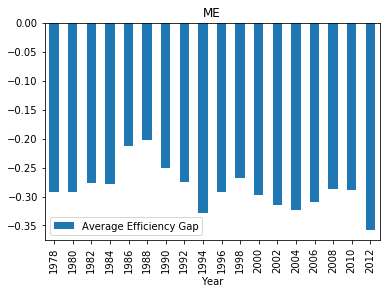

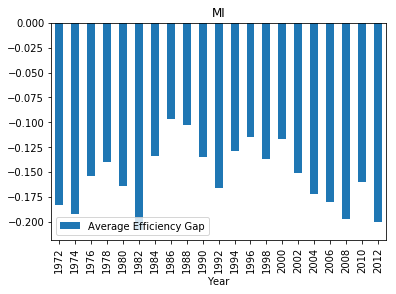

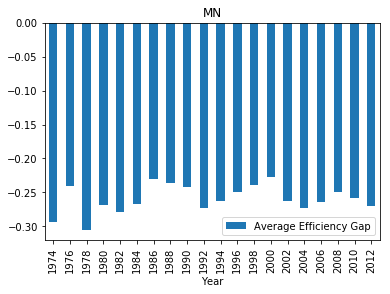

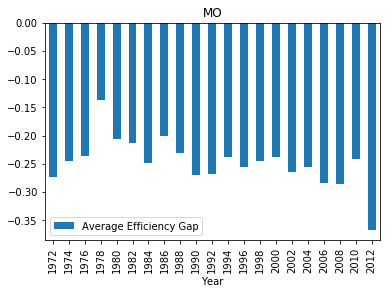

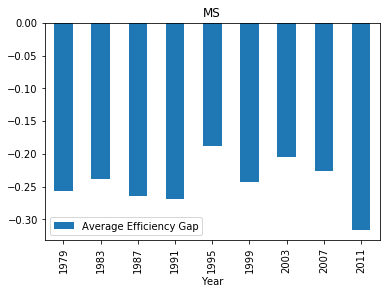

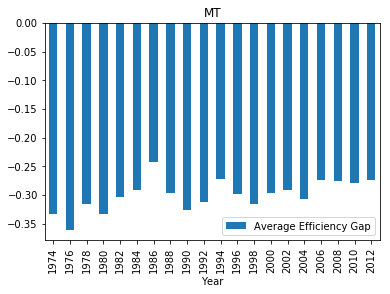

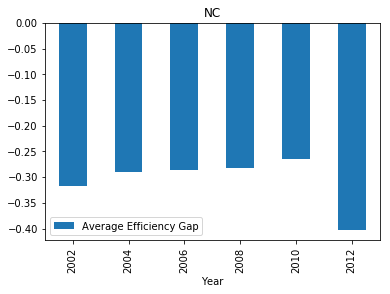

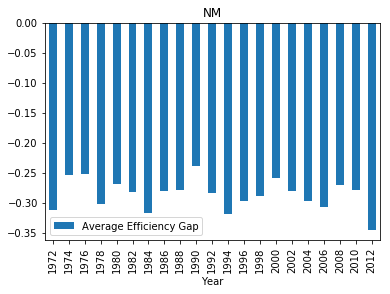

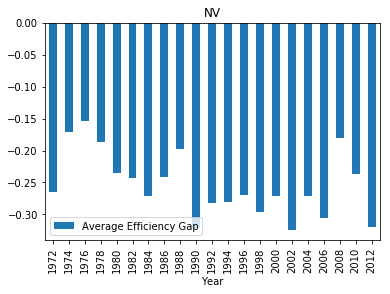

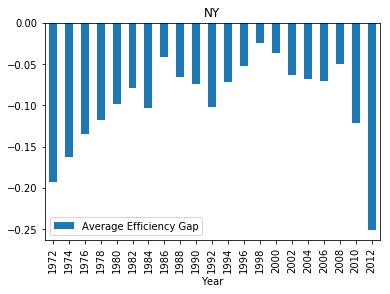

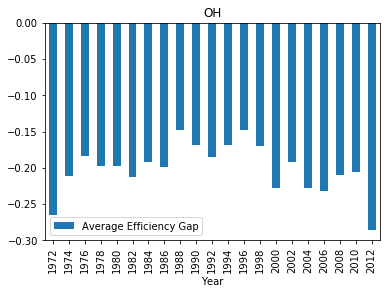

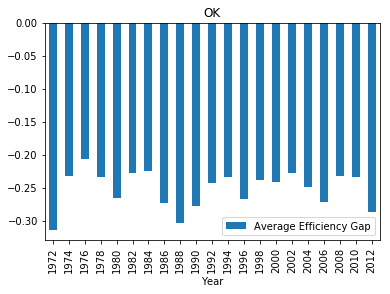

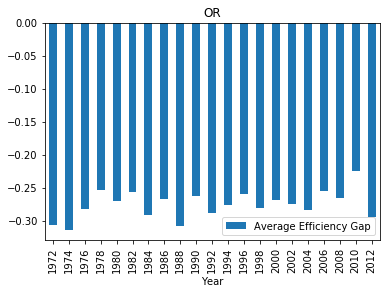

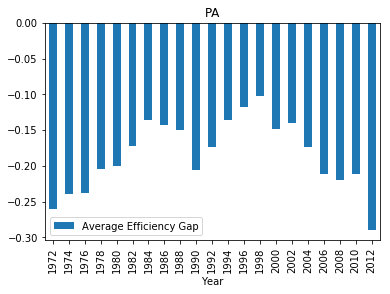

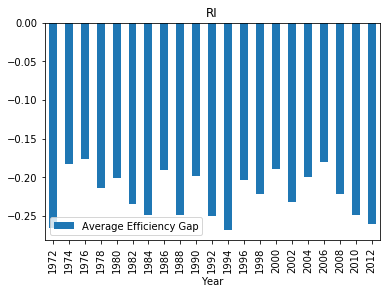

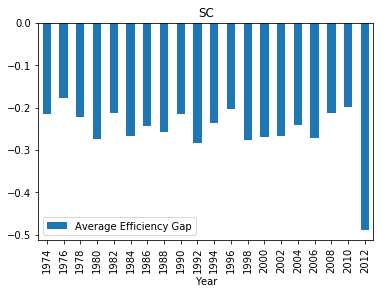

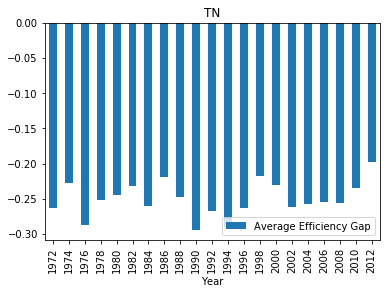

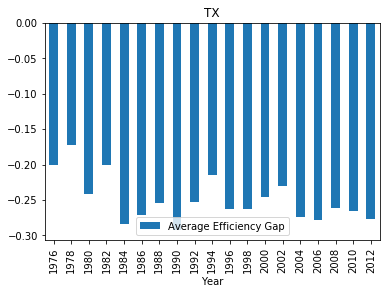

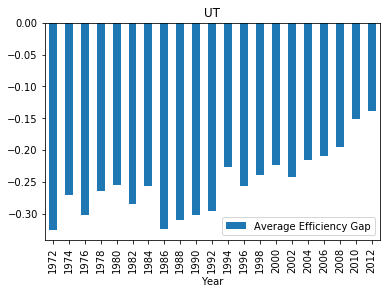

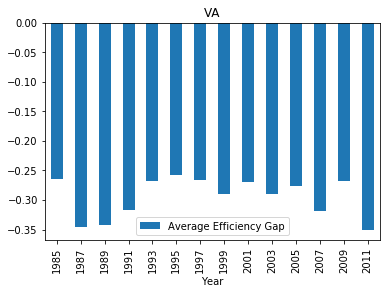

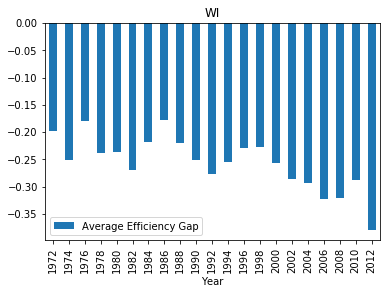

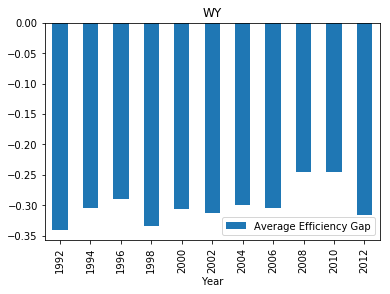

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
for state in states:
    plt = eg_df2.loc[eg_df2['State'] == state].plot(kind='bar', x='Year', y='Average Efficiency Gap')
    plt.set_title(state)

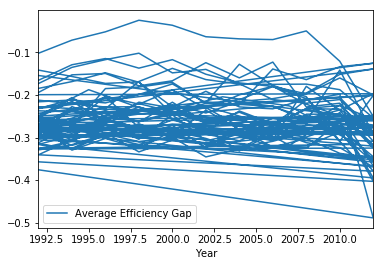

In [11]:
plt2 = eg_df2.plot(x='Year', y='Average Efficiency Gap')

In [69]:
case_df = pd.read_csv('case_data.csv')
print(case_df.shape)
case_df.head()

(17579, 4)


,Case ID,Violation,Year,State
0,3140418,False,'2000','Illinois'
1,457822,False,'1985','Connecticut'
2,666434,False,'1994','Invalid entry'
3,666435,False,'1994','Invalid entry'
4,674190,False,'1994','Hawaii'


In [73]:
import re

bad_cases = []

for i in range(len(case_df)):
    case_df.loc[i, 'Violation'] = re.sub(r'\W+', '', case_df['Violation'][i])
    case_df.loc[i, 'Year'] = case_df['Year'][i][2:-1]
    case_df.loc[i, 'State'] = case_df['State'][i][2:-1]
    if(case_df['State'][i] == 'Invalid entry' or case_df['Violation'][i] == 'False' 
                        or case_df['Year'][i] == 'Date Unknown'):
        bad_cases.append(i)

case_df = case_df.drop(bad_cases)
case_df.head()

,Case ID,Violation,Year,State
31,27,True,2010,Massachusetts
36,32,True,2010,Maine
42,38,True,2010,Arizona
44,40,True,2010,New York
54,50,True,2010,New York


In [89]:
case_df = case_df.reset_index(drop=True)
for i in range(len(case_df)):
    case_df.loc[i, 'Year'] = int(case_df['Year'][i])
    
case_df = case_df.sort_values(by=['Year', 'State'])
case_df = case_df.reset_index(drop=True)
# case_df.to_csv('case_data_cleaned.csv', index=False)
case_df = pd.read_csv('case_data_cleaned.csv')
case_df.head()

,Case ID,Violation,Year,State
0,86936,True,1854,Maryland
1,2770447,True,1865,Kentucky
2,5187,True,1880,Florida
3,4119755,True,1890,Arkansas
4,532852,True,1906,Alabama


In [90]:
case_df2 = pd.DataFrame(columns=['Year', 'State', 'Number of Cases'])

used_state_years1 = []

for i in range(len(case_df)):
    current_state_year = case_df['State'][i] + str(case_df['Year'][i])
    if current_state_year not in used_state_years1:
        used_state_years1.append(current_state_year)
        num_cases = 0
        for j in range(i, len(case_df)):
            if case_df['State'][j] + str(case_df['Year'][j]) == current_state_year:
                num_cases += 1
            else:
#                 print(current_state_year, 'stop', num_districts)
                break

        case_df2 = case_df2.append({'Year': case_df['Year'][i], 'State': case_df['State'][i], 
                                    'Number of Cases': num_cases}, ignore_index=True)

case_df2.head()

,Year,State,Number of Cases
0,1854,Maryland,1
1,1865,Kentucky,1
2,1880,Florida,1
3,1890,Arkansas,1
4,1906,Alabama,1


In [91]:
# case_df2.to_csv('case_data_graph.csv', index=False)
case_df2 = pd.read_csv('case_data_graph.csv')
case_df2.head()

,Year,State,Number of Cases
0,1854,Maryland,1
1,1865,Kentucky,1
2,1880,Florida,1
3,1890,Arkansas,1
4,1906,Alabama,1


/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


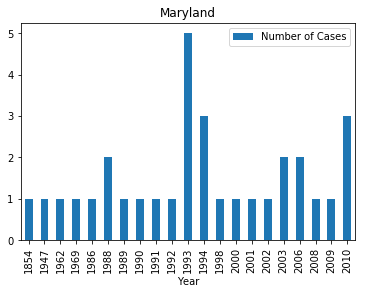

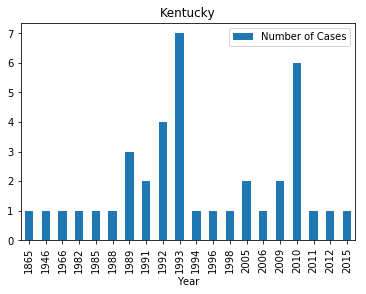

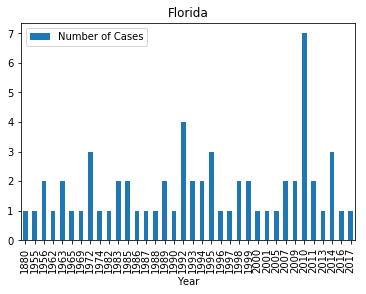

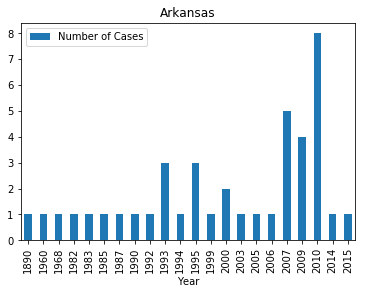

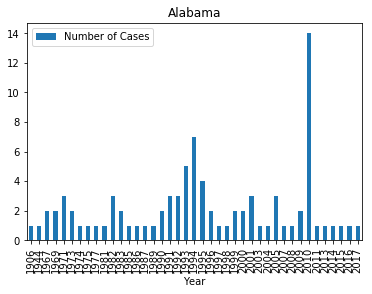

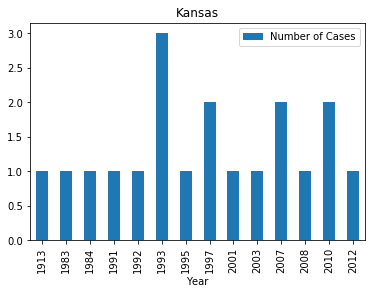

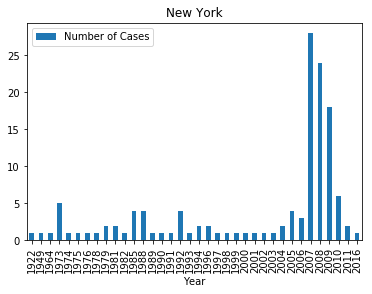

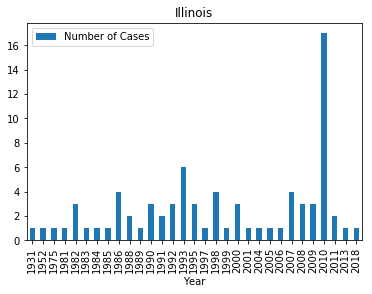

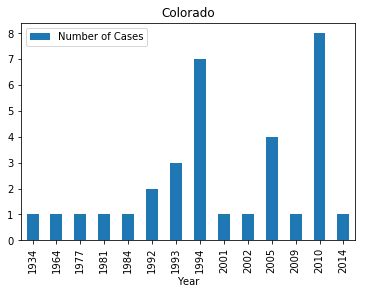

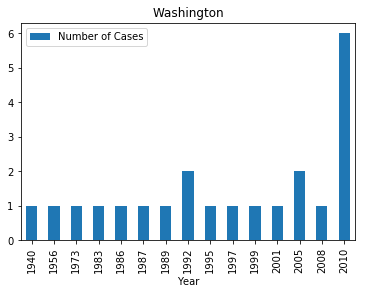

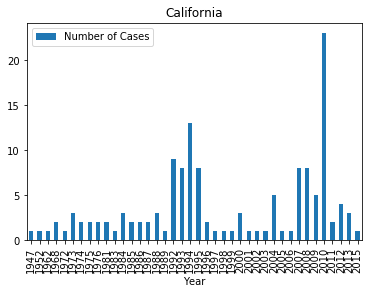

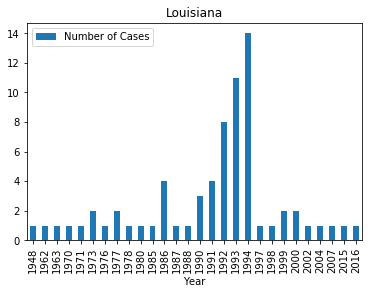

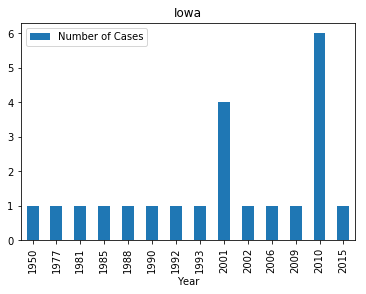

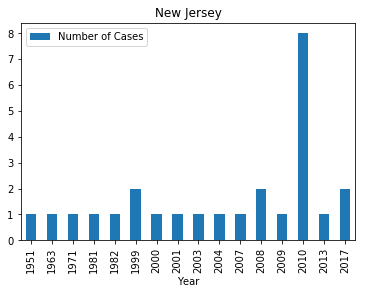

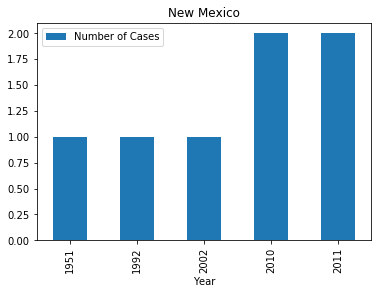

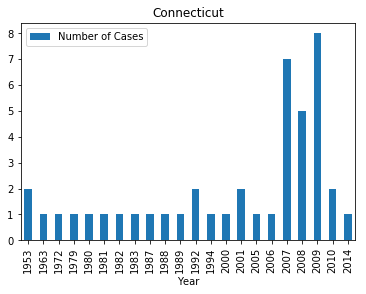

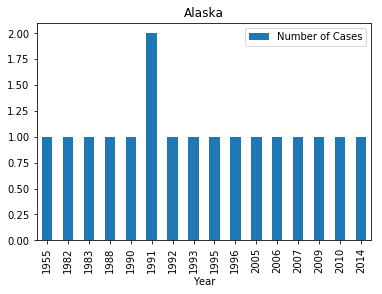

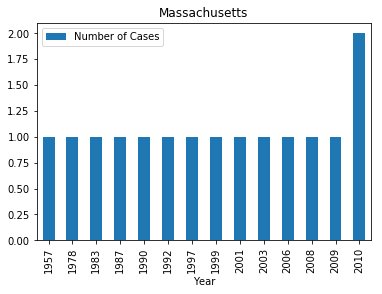

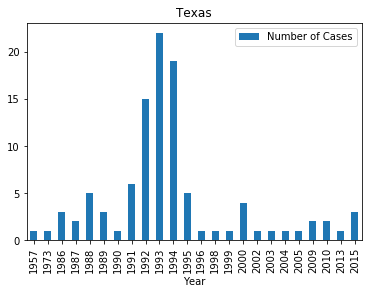

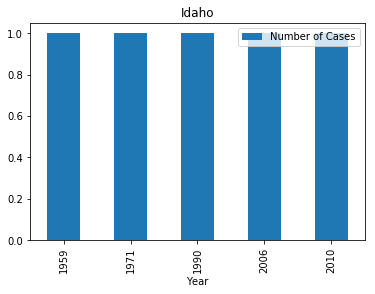

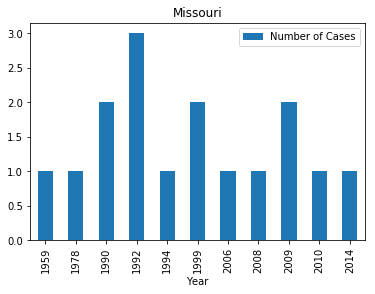

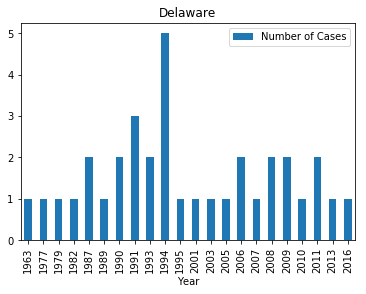

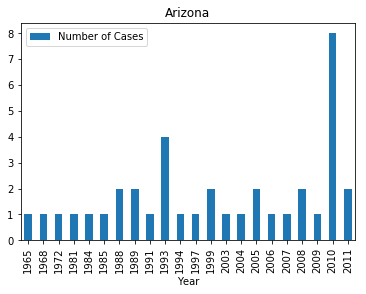

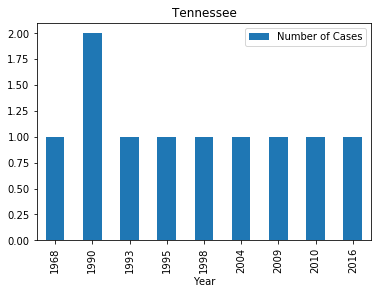

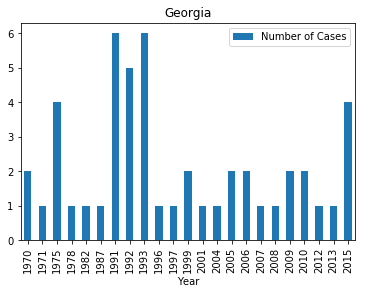

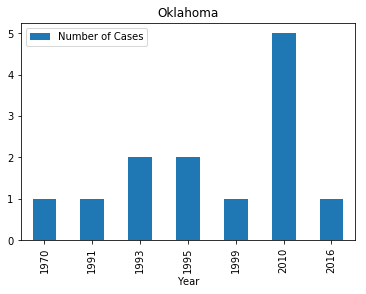

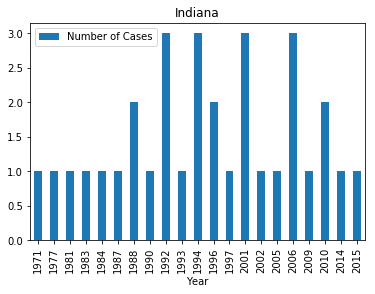

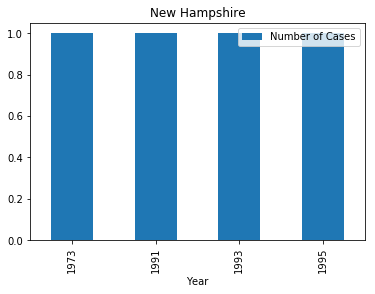

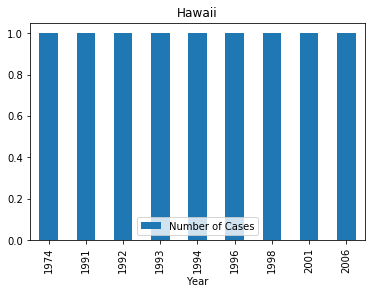

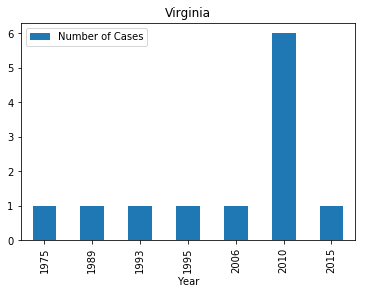

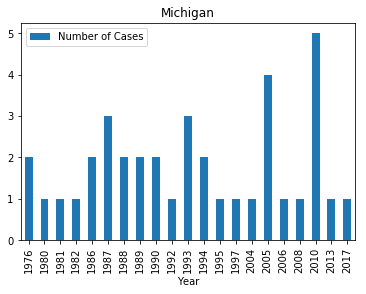

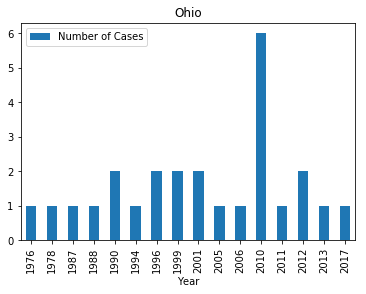

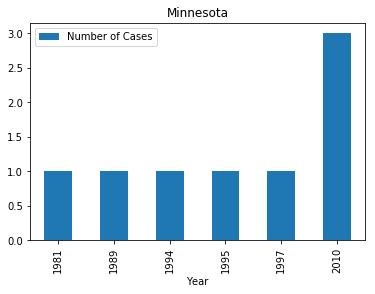

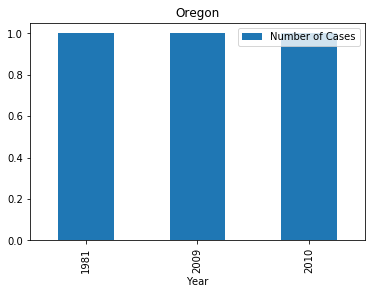

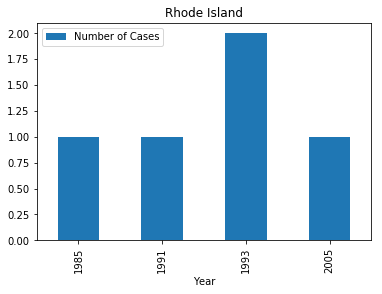

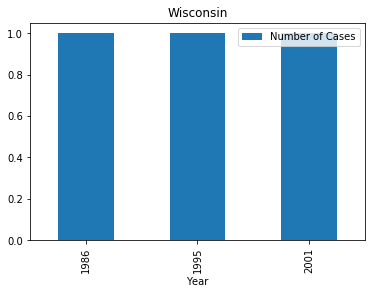

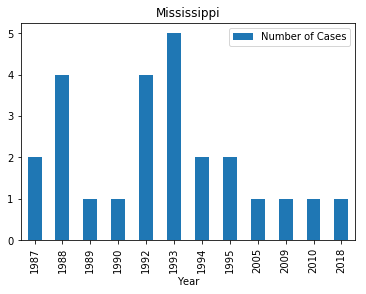

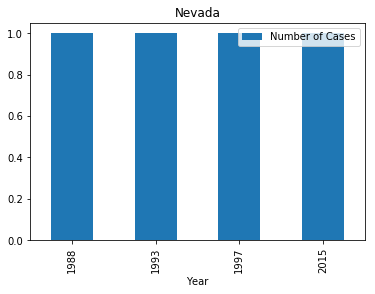

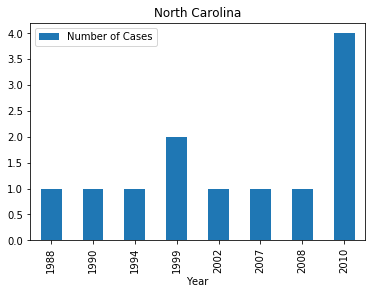

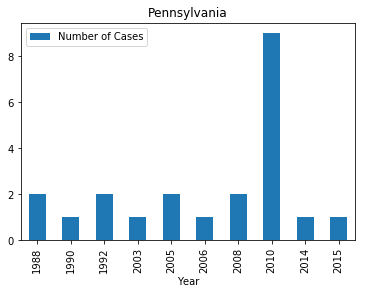

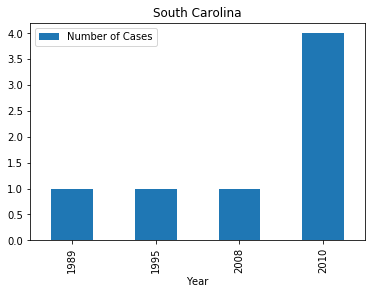

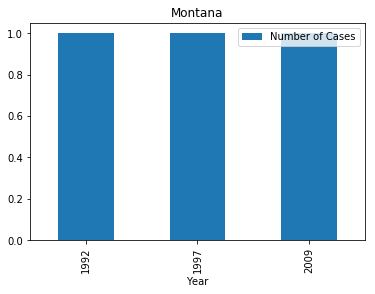

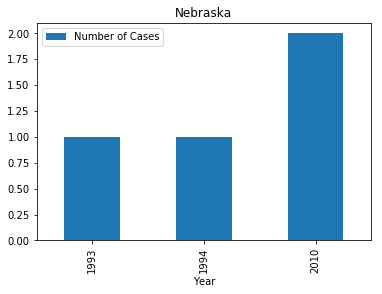

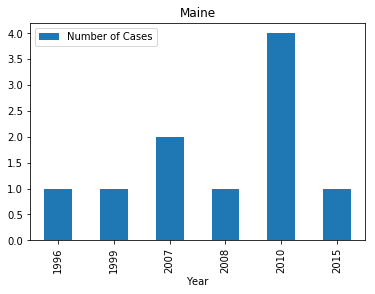

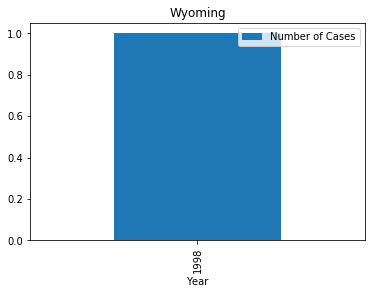

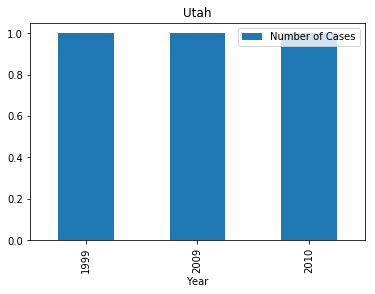

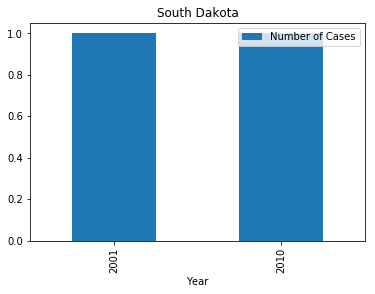

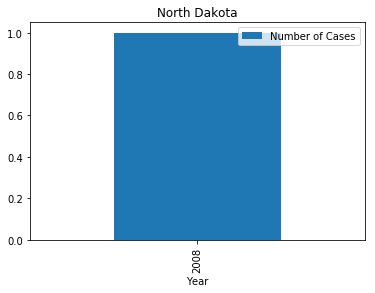

In [96]:
states1 = []
for i in range(len(case_df)):
    state = case_df['State'][i]
    if state not in states1:
        states1.append(state)

for state in states1:
    plt = case_df2.loc[case_df2['State'] == state].plot(kind='bar', x='Year', y='Number of Cases')
    plt.set_title(state)